# Phase 2 Code Challenge Review

The topics covered will be:

1. SQL
2. Bayesian Statistics
3. Normal Distributions
4. Statistical Tests

In [1]:
from src.call import call_on_students

## Part 1: SQL

In [2]:
# Need to import pandas and sqlite3
import pandas as pd
import sqlite3

In [3]:
conn = sqlite3.connect('data/Chinook_Sqlite.sqlite')

In [4]:
pd.read_sql(
    """
    SELECT *
    FROM Customer
    LIMIT 3
    """, conn
)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3


In [5]:
pd.read_sql(
    """
    SELECT *
    FROM Invoice
    LIMIT 3
    """, conn
)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94


### Task 1: Write a query to return the customer IDs for every customer in Germany.

In [6]:
call_on_students(1)

['Whitlee']


In [9]:
pd.read_sql("""

SELECT CustomerId
FROM Customer
WHERE Country = "Germany"


""" , conn)

,CustomerId
0,2
1,36
2,37
3,38


### Task 2: Write a query to return the last names, email addresses and *billing* addresses of the customers who live in Canada.

In [10]:
call_on_students(1)

['Nathan']


In [12]:
pd.read_sql("""

SELECT LastName, Email, Address
FROM Customer
WHERE country = 'Canada'

""" , conn)

,LastName,Email,Address
0,Tremblay,ftremblay@gmail.com,1498 rue Bélanger
1,Philips,mphilips12@shaw.ca,8210 111 ST NW
2,Peterson,jenniferp@rogers.ca,700 W Pender Street
3,Brown,robbrown@shaw.ca,796 Dundas Street West
4,Francis,edfrancis@yachoo.ca,230 Elgin Street
5,Silk,marthasilk@gmail.com,194A Chain Lake Drive
6,Mitchell,aaronmitchell@yahoo.ca,696 Osborne Street
7,Sullivan,ellie.sullivan@shaw.ca,5112 48 Street


In [17]:
pd.read_sql("""

SELECT DISTINCT LastName, Email, Address, BillingAddress
FROM Customer AS c
    JOIN Invoice AS i
        ON c.CustomerId = i.CustomerId  -- could do this instead: USING(CustomerId)
WHERE country = 'Canada'


""" , conn)

,LastName,Email,Address,BillingAddress
0,Philips,mphilips12@shaw.ca,8210 111 ST NW,8210 111 ST NW
1,Silk,marthasilk@gmail.com,194A Chain Lake Drive,194A Chain Lake Drive
2,Sullivan,ellie.sullivan@shaw.ca,5112 48 Street,5112 48 Street
3,Peterson,jenniferp@rogers.ca,700 W Pender Street,700 W Pender Street
4,Brown,robbrown@shaw.ca,796 Dundas Street West,796 Dundas Street West
5,Francis,edfrancis@yachoo.ca,230 Elgin Street,230 Elgin Street
6,Mitchell,aaronmitchell@yahoo.ca,696 Osborne Street,696 Osborne Street
7,Tremblay,ftremblay@gmail.com,1498 rue Bélanger,1498 rue Bélanger



### Task 3: Write a query to return the billing totals by country, in descending order of the totals.

In [18]:
call_on_students(1)

['Yiyi']


In [19]:
pd.read_sql("""

SELECT billingcountry, SUM(total) as billing_total
FROM invoice
GROUP BY billingcountry
ORDER BY billing_total DESC



""" , conn)

,BillingCountry,billing_total
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


### ***Task 4: Write a query to return the last names, email addresses, billing addresses, and most recent invoice dates for the customers whose most recent invoice is after Dec 31, 2011.

In [21]:
pd.read_sql(
    """
    SELECT *
    FROM Invoice
    LIMIT 3
    """, conn
).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceId          3 non-null      int64  
 1   CustomerId         3 non-null      int64  
 2   InvoiceDate        3 non-null      object 
 3   BillingAddress     3 non-null      object 
 4   BillingCity        3 non-null      object 
 5   BillingState       0 non-null      object 
 6   BillingCountry     3 non-null      object 
 7   BillingPostalCode  3 non-null      object 
 8   Total              3 non-null      float64
dtypes: float64(1), int64(2), object(6)
memory usage: 344.0+ bytes


In [20]:
call_on_students(1)

['JD']


In [24]:
pd.read_sql("""

SELECT lastname, email, billingaddress, MAX(invoicedate) AS recent_invoice
FROM customer
    JOIN invoice
        USING(customerid)
GROUP BY CustomerId
HAVING recent_invoice > "2011-12-31"
""" , conn)

,LastName,Email,BillingAddress,recent_invoice
0,Gonçalves,luisg@embraer.com.br,"Av. Brigadeiro Faria Lima, 2170",2013-08-07 00:00:00
1,Köhler,leonekohler@surfeu.de,Theodor-Heuss-Straße 34,2012-07-13 00:00:00
2,Tremblay,ftremblay@gmail.com,1498 rue Bélanger,2013-09-20 00:00:00
3,Hansen,bjorn.hansen@yahoo.no,Ullevålsveien 14,2013-10-03 00:00:00
4,Wichterlová,frantisekw@jetbrains.com,Klanova 9/506,2013-05-06 00:00:00
5,Holý,hholy@gmail.com,Rilská 3174/6,2013-11-13 00:00:00
6,Gruber,astrid.gruber@apple.at,"Rotenturmstraße 4, 1010 Innere Stadt",2013-06-19 00:00:00
7,Peeters,daan_peeters@apple.be,Grétrystraat 63,2013-10-04 00:00:00
8,Nielsen,kara.nielsen@jubii.dk,Sønder Boulevard 51,2013-02-02 00:00:00
9,Martins,eduardo@woodstock.com.br,"Rua Dr. Falcão Filho, 155",2013-08-12 00:00:00


In [33]:
pd.read_sql("""

SELECT lastname, email, billingaddress, MAX(invoicedate) AS recent_invoice
FROM customer
    JOIN invoice
        USING(customerid)
WHERE invoicedate >= 2012
GROUP BY customerid
""" , conn)

,LastName,Email,BillingAddress,recent_invoice
0,Gonçalves,luisg@embraer.com.br,"Av. Brigadeiro Faria Lima, 2170",2013-08-07 00:00:00
1,Köhler,leonekohler@surfeu.de,Theodor-Heuss-Straße 34,2012-07-13 00:00:00
2,Tremblay,ftremblay@gmail.com,1498 rue Bélanger,2013-09-20 00:00:00
3,Hansen,bjorn.hansen@yahoo.no,Ullevålsveien 14,2013-10-03 00:00:00
4,Wichterlová,frantisekw@jetbrains.com,Klanova 9/506,2013-05-06 00:00:00
5,Holý,hholy@gmail.com,Rilská 3174/6,2013-11-13 00:00:00
6,Gruber,astrid.gruber@apple.at,"Rotenturmstraße 4, 1010 Innere Stadt",2013-06-19 00:00:00
7,Peeters,daan_peeters@apple.be,Grétrystraat 63,2013-10-04 00:00:00
8,Nielsen,kara.nielsen@jubii.dk,Sønder Boulevard 51,2013-02-02 00:00:00
9,Martins,eduardo@woodstock.com.br,"Rua Dr. Falcão Filho, 155",2013-08-12 00:00:00


## Part 2: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 5: Calculate the probability

In [34]:
call_on_students(1)

['Jay']


**1. Which probability are we trying to find?**

   - p of democrat given voted no
   

**2. Based on that, what other pieces do we need?**

   - total probability of no
   - known probabilities
       - p(demo) = .6
       - p(reb) = .4
       - p(no|demo) = .75
       - p(yes|demo) = .25
       - p(no|reb) = .05
       - p(yes|reb) = .95
    

**3. Result?**

 - 

In [35]:
p_no = (.6 * .75) + (.4 * .05)

In [36]:
p_demo_no =  (.6 * .75) / p_no

In [37]:
p_demo_no

0.9574468085106382

## Part 3: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 6: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [38]:
call_on_students(1)

['Nate']


In [53]:
# Code here
mu = 6
sigma = 2
x = 8
z_eight = (x - mu) / 2 
z_eight

1.0

### Task 7: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [40]:
call_on_students(1)

['Katie']


In [41]:
from scipy import stats

In [42]:
# Code here
over_eight = stats.norm.sf(1)
over_eight

0.15865525393145707

In [50]:
1 - stats.norm.cdf(1)

0.15865525393145707

In [45]:
stats.norm.sf(8, loc=6, scale=2)

0.15865525393145707

In [47]:
1 - stats.norm.cdf(8, loc=6, scale=2)

0.15865525393145707

### Task 8: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [54]:
call_on_students(1)

['Jacob']


In [61]:
confidence_level = .95
(1 + confidence_level) / 2

0.975

In [71]:
# Code here
mean_sleep_7 = 5
std_dev_sleep_7 = .5
sample_size_7 = 7
confidence_level = .95
#calc the zscore for a 95% confidence interval
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=6)
#calc the standard error of the mean
standard_error =  std_dev_sleep_7 / (sample_size_7 ** .5)
#calc the margin of error
margin_of_error = t_critical * standard_error
#calc the conmfidence interval
lower_limit = mean_sleep_7 - margin_of_error
upper_limit = mean_sleep_7 + margin_of_error

print(f"95 % Confidence Interval: ({lower_limit}, {upper_limit})")

95 % Confidence Interval: (4.53757712628571, 5.46242287371429)


In [72]:
standard_error

0.1889822365046136

In [59]:
margin_of_error

-0.4624228737142907

In [67]:
stats.t.interval(alpha=.95, loc=mean_sleep_7, scale=standard_error, df=6)

(4.53757712628571, 5.46242287371429)

### Task 9: Interpret the 95% Confidence Interval that you derived in the above question

In [68]:
call_on_students(1)

['Shelley']


Interpret: 

- If we calculated an interval for 100 samples we would expect 95% of those intervals to contain the true mean hours of sleep for that one freshman
- We are 95% confident that the true mean hours of sleep for this one student is b/t 4.54 and 5.46


## Part 4: Statistical Testing

Let's make some hypotheses about cars!

### Task 10: Set Up

In [73]:
call_on_students(1)

['Rigat']


In [74]:
# Imports - need pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv("data/auto-mpg.csv")

In [76]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [77]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
391,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [78]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [79]:
# Describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [80]:
df['model year'].value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model year, dtype: int64

In [81]:
df['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

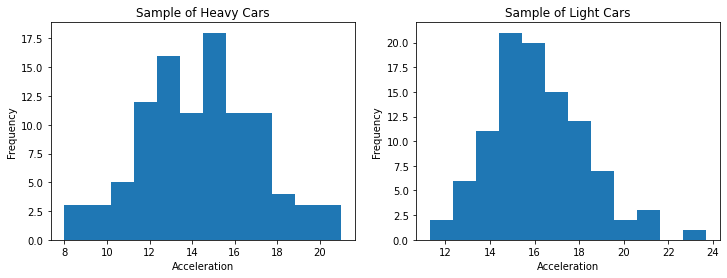

In [82]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 11: Set up the null and alternative hypotheses for this test

In [83]:
call_on_students(1)

['Juvenson']


**Null hypothesis:**

- Light cars do not accelerate faster than heavy cars


**Alternative hypothesis:**

- Light cars do accelerate faster than heavy cars


### Task 12: Describe your Type 1 and Type 2 errors in this context

In [84]:
call_on_students(1)

['Pat']


**Type I Error:**

- False Positive: Our test shows that light cars have signifcantly faster acceleration than heavy cars when in reality they do not accelerate faster 


**Type II Error:**

- False Negatives: Our test fails to reject the null that light cars accelerate sign. faster when in reality they do accelerate faster



### Task 13: The Hypothesis Test!

### 13a: Describe the type of test:

In [85]:
call_on_students(1)

['Meg']


Description:

- ttest: mean of continous numeric variable (acceleration) and two groups
- 2 sample ttest
- one sided, right tailed (greater)


### 13b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [87]:
call_on_students(1)

['Juvenson']


In [88]:
# Code here
stats.ttest_ind(heavy_cars['acceleration'], light_cars['acceleration'])

Ttest_indResult(statistic=-5.00874014469676, pvalue=1.2096440668168987e-06)

In [95]:
# Code here
stats.ttest_ind(light_cars['acceleration'], heavy_cars['acceleration'])

Ttest_indResult(statistic=5.00874014469676, pvalue=1.2096440668168987e-06)

In [101]:
tstat, pvalue = stats.ttest_ind(light_cars['acceleration'], heavy_cars['acceleration'], equal_var=True)

In [102]:
pvalue = pvalue / 2

In [103]:
pvalue

6.048220334084493e-07

In [91]:
import numpy as np

In [92]:
np.var(light_cars['acceleration'])

4.9233839999999995

In [93]:
np.var(heavy_cars['acceleration'])

7.203299

### 13c: Analyze your results: can you reject the null hypothesis?

In [99]:
call_on_students(1)

['Pat']


In [104]:
pvalue

6.048220334084493e-07

In [100]:
alpha = .05

Can you reject the null hypothesis?

- pvalue < alpha --> we can reject the null hypothesis in favor of alternative. Light cars accelerate faster on average then heavy cars
